## Text Gen

In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('./data/ArticlesApril2018.csv', encoding='latin1')
data.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleadersâ Settlement Offer...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"âI understand that they could meet with us, ...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,Whatâs it like to eat at the second incarnat...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Torontoâs ...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [6]:
data.headline.isna().sum()

0

In [9]:
# numpy array 로 바뀐 뒤, 리스트로 변환
headlines = data.headline.values.tolist()
headlines[:5]

['Former N.F.L. Cheerleadersâ\x80\x99 Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [10]:
len(headlines)

1324

In [68]:
# 노이즈 데이터 ('Unkown') 제거
headlines = [line for line in data.headline.values if line != 'Unknown']
len(headlines)

1214

In [73]:
# encoding, 구둣점 제거, 소문자로 변환
import re
def preprocessing(s):
    s = s.encode('utf8').decode('ascii', 'ignore') # When Error occured: 'strict' or 'ignore'
    s = re.sub('[^A-Za-z0-9 ]', '', s)
    return s.lower()

In [74]:
headlines = [preprocessing(line) for line in headlines]
headlines[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

#### Keras Text preprocessing

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [18]:
# 단어 집합 생성
t = Tokenizer()
t.fit_on_texts(headlines)

In [19]:
# 단어 집합 크기 - Keras Tokenizer의 시작 인덱스가 1 이므로 1을 더해줘야함
vocab_size = len(t.word_index) + 1
vocab_size

3596

- Sequence 생성

In [21]:
sequences = []
for line in headlines:
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequences.append(encoded[:i+1])
sequences[:10]

[[104, 176],
 [104, 176, 90],
 [104, 176, 90, 142],
 [104, 176, 90, 142, 1128],
 [104, 176, 90, 142, 1128, 1129],
 [104, 176, 90, 142, 1128, 1129, 595],
 [104, 176, 90, 142, 1128, 1129, 595, 52],
 [104, 176, 90, 142, 1128, 1129, 595, 52, 7],
 [104, 176, 90, 142, 1128, 1129, 595, 52, 7, 2],
 [104, 176, 90, 142, 1128, 1129, 595, 52, 7, 2, 390]]

In [22]:
# Sequence 중에서 제일 길이가 김ㄴ 것
max_len = max(len(seq) for seq in sequences)
max_len

28

In [23]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
sequences[:3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        104, 176],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 104,
        176,  90],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 104, 176,
         90, 142]])

In [24]:
X = sequences[:, :-1]
y = sequences[:, -1]
Y = to_categorical(y)
X.shape, Y.shape # ← 단어의 갯수만큼 columns(category)을 가짐

((8047, 27), (8047, 3596))

#### Modeling
- Embedding vector 갯수: 10
- LSTM unit 갯수: 128

In [26]:
import numpy as np
import tensorflow as tf
seed = 200
np.random.seed(seed)
tf.random.set_seed(seed)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN, GRU
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Embedding(vocab_size, 10, input_length=max_len-1), # vocab_size를 10개로 줄여서 표현
    # 텍스트 생성이기 때문에 데이터의 마지막 셀을 y 로 지정했으므로 max_len - 1
    LSTM(128),
    Dense(vocab_size, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 27, 10)            35960     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               71168     
_________________________________________________________________
dense_3 (Dense)              (None, 3596)              463884    
Total params: 571,012
Trainable params: 571,012
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [32]:
# Text Generation 이기 때문에 별도의 Validation set 지정하지 않음
hist = model.fit(X, Y, epochs=200, verbose=1)

Epoch 1/200
252/252 [==============================] - 10s 13ms/step - loss: 7.7847 - accuracy: 0.02060s - loss: 7.8036 
Epoch 2/200
252/252 [==============================] - 4s 14ms/step - loss: 7.1500 - accuracy: 0.0308 1s - loss: 7.1554  - ETA
Epoch 3/200
252/252 [==============================] - 3s 13ms/step - loss: 7.0027 - accuracy: 0.0283
Epoch 4/200
252/252 [==============================] - 3s 13ms/step - loss: 6.8951 - accuracy: 0.0383
Epoch 5/200
252/252 [==============================] - 3s 13ms/step - loss: 6.7641 - accuracy: 0.0397
Epoch 6/200
252/252 [==============================] - 3s 14ms/step - loss: 6.5643 - accuracy: 0.0471
Epoch 7/200
252/252 [==============================] - 3s 14ms/step - loss: 6.3866 - accuracy: 0.0486
Epoch 8/200
252/252 [==============================] - 3s 13ms/step - loss: 6.1483 - accuracy: 0.0541
Epoch 9/200
252/252 [==============================] - 4s 14ms/step - loss: 5.9138 - accuracy: 0.0642
Epoch 10/200
252/252 [================

In [33]:
hist.history['accuracy'][-1]

0.9192245602607727

- 모델 검증

In [35]:
from my_util import sentence_generation

In [36]:
print(sentence_generation(model, t, max_len, 'former', 8))
print(sentence_generation(model, t, max_len, 'epa', 8))
print(sentence_generation(model, t, max_len, 'how', 8))

former playboy model is free to discuss alleged affair
epa lets in the light of the west of
how to serve a deranged tyrant stoically home become


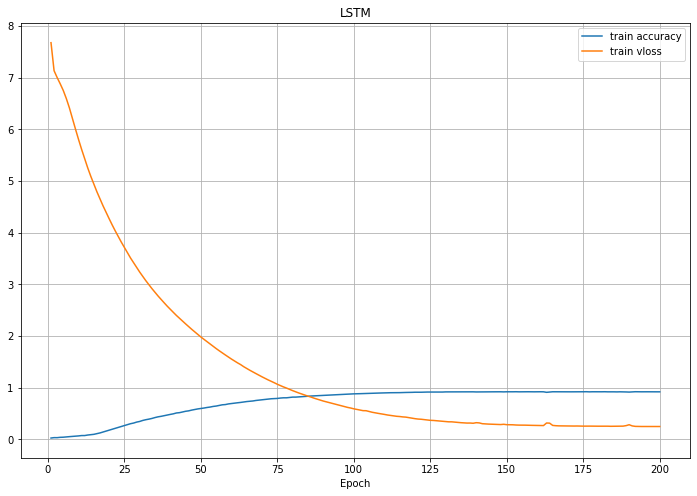

In [63]:
import matplotlib.pyplot as plt

y_acc = hist.history['accuracy']
y_loss = hist.history['loss']
xs = np.arange(1, len(y_acc)+1)

plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_loss, label='train vloss')
plt.legend(), plt.grid()
plt.xlabel('Epoch'), plt.title('LSTM');

#### Simple RNN

In [46]:
model_2 = Sequential([
    Embedding(vocab_size, 10, input_length=max_len-1),
    SimpleRNN(128),
    Dense(vocab_size, activation='softmax')
])

es = EarlyStopping(monitor='loss',patience=10)

In [59]:
model_2.compile('adam', 'categorical_crossentropy',['accuracy'])
hist_2 = model_2.fit(X, Y, epochs=200, verbose=1, callbacks=[es])

Epoch 1/200
252/252 [==============================] - 12s 42ms/step - loss: 6.7480 - accuracy: 0.0396
Epoch 2/200
252/252 [==============================] - 10s 41ms/step - loss: 6.6235 - accuracy: 0.0493
Epoch 3/200
252/252 [==============================] - 10s 40ms/step - loss: 6.3178 - accuracy: 0.0628
Epoch 4/200
252/252 [==============================] - 10s 42ms/step - loss: 6.0366 - accuracy: 0.0624
Epoch 5/200
252/252 [==============================] - 10s 41ms/step - loss: 5.7825 - accuracy: 0.0711
Epoch 6/200
252/252 [==============================] - 11s 42ms/step - loss: 5.4814 - accuracy: 0.0763
Epoch 7/200
252/252 [==============================] - 11s 44ms/step - loss: 5.2416 - accuracy: 0.0904
Epoch 8/200
252/252 [==============================] - 11s 42ms/step - loss: 4.9723 - accuracy: 0.1169
Epoch 9/200
252/252 [==============================] - 12s 46ms/step - loss: 4.7163 - accuracy: 0.1517
Epoch 10/200
252/252 [==============================] - 11s 43ms/step - l

In [60]:
hist_2.history['accuracy'][-1]

0.9179818630218506

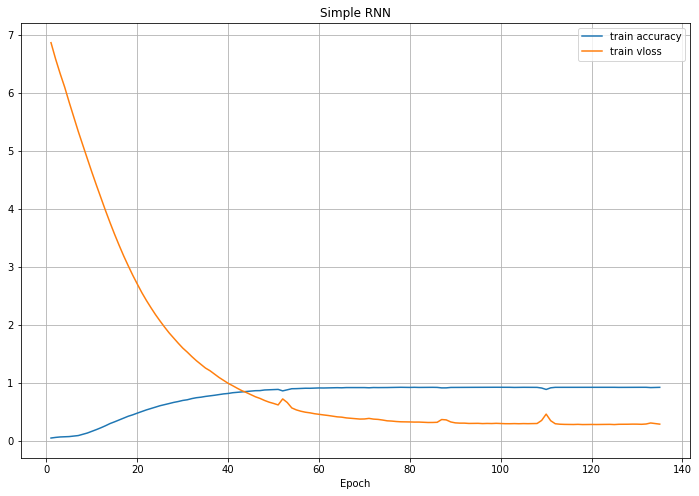

In [62]:
y_acc_2 = hist_2.history['accuracy']
y_vloss_2 = hist_2.history['loss']
xs_2 = np.arange(1, len(y_acc_2)+1)

plt.figure(figsize=(12, 8))
plt.plot(xs_2, y_acc_2, label='train accuracy')
plt.plot(xs_2, y_vloss_2, label='train vloss')
plt.legend(), plt.grid()
plt.xlabel('Epoch'), plt.title('Simple RNN');

#### GRU

In [64]:
model_3 = Sequential([
    Embedding(vocab_size, 10, input_length=max_len-1),
    GRU(128),
    Dense(vocab_size, activation='softmax')
])

In [65]:
model_3.compile('adam', 'categorical_crossentropy',['accuracy'])
hist_3 = model_3.fit(X, Y, epochs=100, verbose=1, callbacks=[es])

Epoch 1/100
252/252 [==============================] - 6s 15ms/step - loss: 7.8707 - accuracy: 0.0212
Epoch 2/100
252/252 [==============================] - 4s 15ms/step - loss: 7.2050 - accuracy: 0.0308
Epoch 3/100
252/252 [==============================] - 3s 13ms/step - loss: 6.9725 - accuracy: 0.0322
Epoch 4/100
252/252 [==============================] - 3s 13ms/step - loss: 6.7560 - accuracy: 0.0462
Epoch 5/100
252/252 [==============================] - 4s 14ms/step - loss: 6.4898 - accuracy: 0.0538
Epoch 6/100
252/252 [==============================] - 4s 15ms/step - loss: 6.1571 - accuracy: 0.0585
Epoch 7/100
252/252 [==============================] - 3s 13ms/step - loss: 5.8730 - accuracy: 0.0710
Epoch 8/100
252/252 [==============================] - 3s 13ms/step - loss: 5.5623 - accuracy: 0.0759
Epoch 9/100
252/252 [==============================] - 3s 13ms/step - loss: 5.2615 - accuracy: 0.0868
Epoch 10/100
252/252 [==============================] - 4s 16ms/step - loss: 4.986

In [66]:
hist_3.history['accuracy'][-1]

0.918727457523346

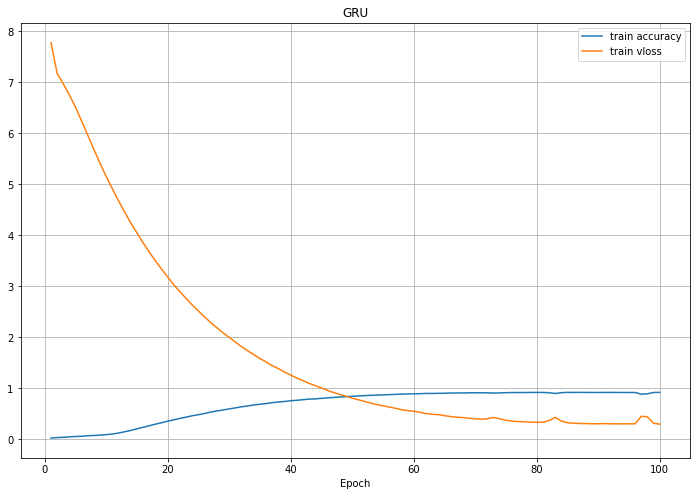

In [67]:
y_acc_3 = hist_3.history['accuracy']
y_vloss_3 = hist_3.history['loss']
xs_3 = np.arange(1, len(y_acc_3)+1)

plt.figure(figsize=(12, 8))
plt.plot(xs_3, y_acc_3, label='train accuracy')
plt.plot(xs_3, y_vloss_3, label='train vloss')
plt.legend(), plt.grid()
plt.xlabel('Epoch'), plt.title('GRU');